In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
rs = []
cta = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    numCells = calc.shape[1]
    threat = epmthreat(track['mouse_positionMS'], behav)
    
    for c in range(numCells):
        ctype = celltypebehav(calc[:, c], behav)
        cta.append(ctype)
        r = pearsonr(calc[:, c], threat)[0]
        rs.append(r)
        if len(rs) == 461:
            c_pos = calc[:, c]
            t_pos = threat
        if len(rs) == 183:
            c_neg = calc[:, c]
            t_neg = threat
        
rs = np.array(rs)
cta = np.array(cta)

(-0.3248374936083214, 3.6378020937724754e-221)
(0.6595445366483643, 0.0)


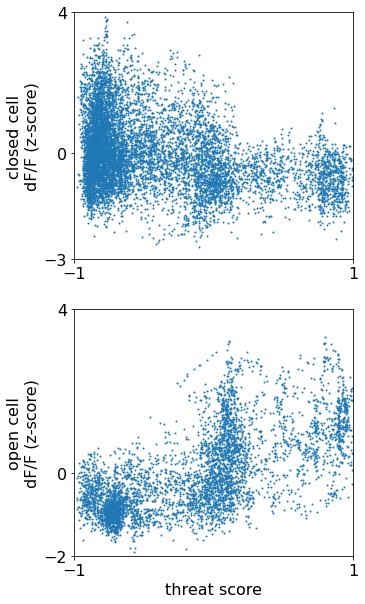

In [3]:
plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.scatter(t_neg, c_neg, s=1)
plt.xlim(-1, 1)
plt.xticks([-1, 1])
plt.ylim(-3, 4)
plt.yticks([-3, 0, 4])
plt.ylabel('closed cell\ndF/F (z-score)')
print(pearsonr(t_neg, c_neg))

plt.subplot(2, 1, 2)
plt.scatter(t_pos, c_pos, s=1)
plt.xlim(-1, 1)
plt.xticks([-1, 1])
plt.ylim(-2, 4)
plt.yticks([-2, 0, 4])
plt.xlabel('threat score')
plt.ylabel('open cell\ndF/F (z-score)')
print(pearsonr(t_pos, c_pos))

plt.savefig('./elife_figs/2Gl.svg')

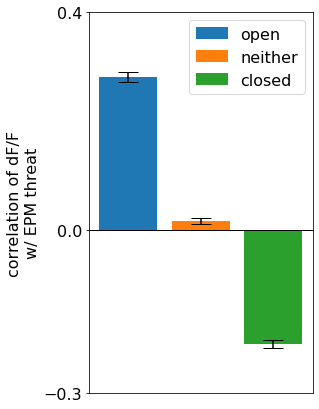

In [4]:
plt.figure(figsize=(4, 7))
for i, typ in enumerate(['o', 'n', 'c']):
    plt.bar(i, np.mean(rs[cta==typ]))
plt.legend(['open', 'neither', 'closed'])
for i, typ in enumerate(['o', 'n', 'c']):
    plt.errorbar(i, np.mean(rs[cta==typ]), sem(rs[cta==typ]), fmt='k_', ms=0, capsize=10)
plt.ylabel('correlation of dF/F\nw/ EPM threat')
plt.ylim(-0.3, 0.4)
plt.yticks([-0.3, 0, 0.4])
plt.xticks([])
plt.plot(0, 0, 'k_', ms=2000)
plt.savefig('./elife_figs/2Gr.svg')